In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

In [35]:
url = "https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv"

In [36]:
online_retail = pd.read_csv(url, encoding= 'unicode_escape')

print(online_retail.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  


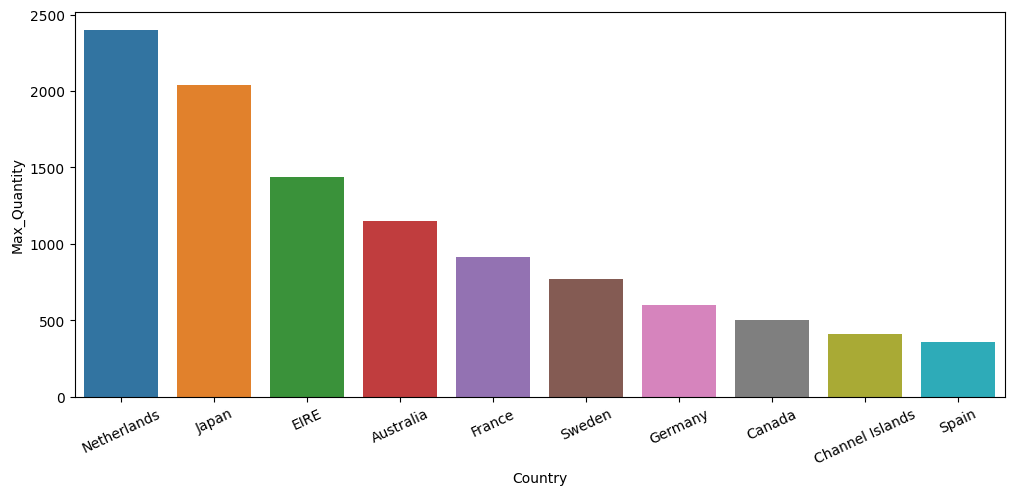

In [37]:
mostQnty = online_retail.groupby(by="Country")[["Quantity"]].max().add_prefix("Max_")
mostQnty = mostQnty.sort_values(by="Max_Quantity",ascending=False).reset_index()

mostQnty.drop(mostQnty[mostQnty.Country == "United Kingdom"].index,inplace=True)
mostQnty = mostQnty.drop(mostQnty.index[10:]).reset_index(drop=True)

plt.figure(figsize=(12, 5))
sns.barplot(x="Country",y="Max_Quantity",data=mostQnty)
plt.xticks(rotation=25)
plt.show()

In [38]:
online_rt1 = online_retail[(online_retail.Quantity > 0)].reset_index(drop=True)

print(online_rt1)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
531280    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
531281    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
531282    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
531283    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
531284    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID         Country  
0        12/

<ipython-input-39-b24d6c93d8dc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers = online_retail.groupby(['CustomerID','Country']).sum()
<ipython-input-39-b24d6c93d8dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Country'] = customers.index.get_level_values(1)


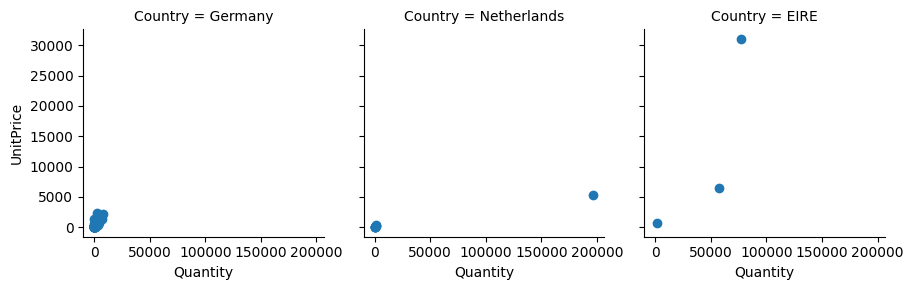

In [39]:
customers = online_retail.groupby(['CustomerID','Country']).sum()

customers = customers[customers.UnitPrice > 0]

customers['Country'] = customers.index.get_level_values(1)

top_countries =  ['Netherlands', 'EIRE', 'Germany']

customers = customers[customers['Country'].isin(top_countries)]

g = sns.FacetGrid(customers, col="Country")

g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

g.add_legend()